In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
weather_data = pd.read_csv("GlobalWeatherRepository.csv")

In [3]:
weather_data.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [4]:
weather_data.shape

(56906, 41)

In [5]:
print(f"Dataset contains {weather_data.shape[0]} rows and {weather_data.shape[1]} columns.")

Dataset contains 56906 rows and 41 columns.


In [14]:
# Identify the correct datetime column
datetime_column = "last_updated"  # Adjust if necessary

In [15]:
# Convert to datetime and extract the year
weather_data = weather_data[pd.to_datetime(weather_data[datetime_column], errors='coerce').notna()]
weather_data['Year'] = pd.to_datetime(weather_data[datetime_column]).dt.year

In [16]:
# Select relevant columns
weather_data = weather_data[['Year', 'temperature_celsius']]

In [17]:
# Drop missing values
weather_data.dropna(inplace=True)

In [18]:
weather_data.head()

,Year,temperature_celsius
0,2024,26.6
1,2024,19.0
2,2024,23.0
3,2024,6.3
4,2024,26.0


In [19]:
# Compute yearly average temperature
yearly_avg_temp = weather_data.groupby("Year")["temperature_celsius"].mean()

In [20]:
# Identify the hottest year
hottest_year = yearly_avg_temp.idxmax()
hottest_temp = yearly_avg_temp.max()

In [21]:
print(f"Year with highest average temperature: {hottest_year} ({hottest_temp:.2f}°C)")

Year with highest average temperature: 2024 (23.61°C)


In [23]:
weather_data.columns

Index(['Year', 'temperature_celsius'], dtype='object')

In [24]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56906 entries, 0 to 56905
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 56906 non-null  int32  
 1   temperature_celsius  56906 non-null  float64
dtypes: float64(1), int32(1)
memory usage: 667.0 KB


In [25]:
# Check for missing values in each column
weather_data.isnull().sum()

Year                   0
temperature_celsius    0
dtype: int64

In [31]:
# Function to detect anomalies using the Z-score method
def detect_anomalies(data, threshold=2.5):
    mean_temp = np.mean(data)
    std_temp = np.std(data)
    z_scores = (data - mean_temp) / std_temp
    anomalies = np.where(np.abs(z_scores) > threshold)[0]
    return anomalies

In [32]:
# Detect anomalies
anomalies = detect_anomalies(weather_data["temperature_celsius"], threshold=2.5)

print(f"Number of detected anomalous temperature spikes: {len(anomalies)}")

Number of detected anomalous temperature spikes: 829


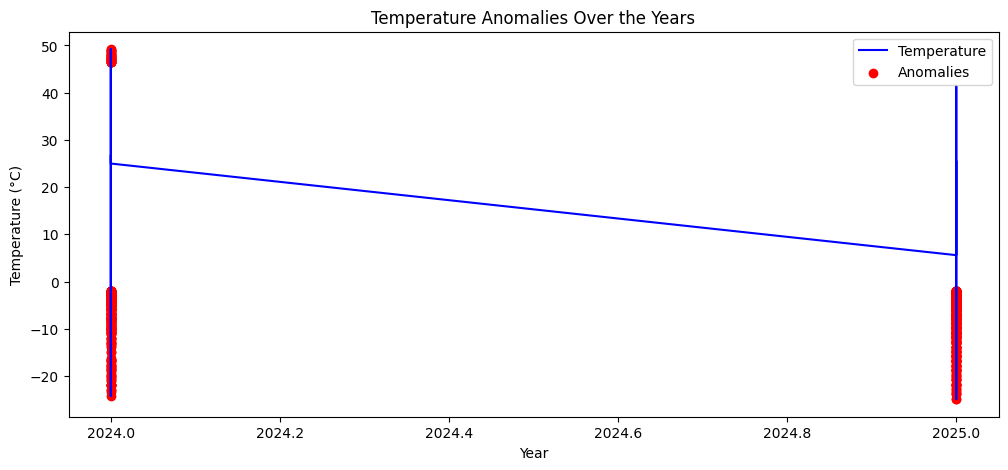

In [33]:
# Plot temperature anomalies
plt.figure(figsize=(12, 5))
plt.plot(weather_data["Year"], weather_data["temperature_celsius"], label="Temperature", color="blue")
plt.scatter(weather_data.iloc[anomalies]["Year"], weather_data.iloc[anomalies]["temperature_celsius"], color='red', label='Anomalies')
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Anomalies Over the Years")
plt.legend()
plt.show()

In [34]:
# Compare average temperatures
historical_avg = yearly_avg_temp[yearly_avg_temp.index < 1950].mean()
recent_avg = yearly_avg_temp[yearly_avg_temp.index >= 2000].mean()

In [35]:
print(f"Historical Average Temperature (before 1950): {historical_avg:.2f}°C")
print(f"Recent Average Temperature (2000+): {recent_avg:.2f}°C")

Historical Average Temperature (before 1950): nan°C
Recent Average Temperature (2000+): 20.56°C


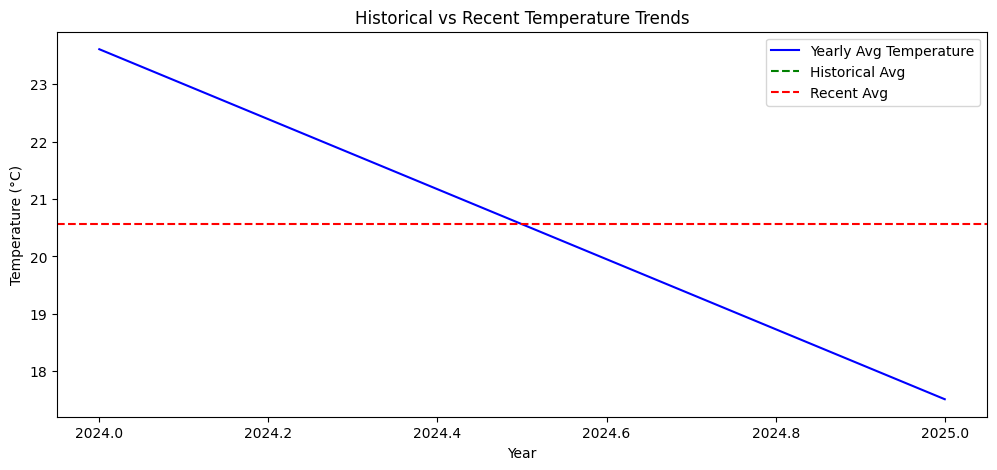

In [36]:
plt.figure(figsize=(12, 5))
plt.plot(yearly_avg_temp.index, yearly_avg_temp.values, label="Yearly Avg Temperature", color="blue")
plt.axhline(y=historical_avg, color='green', linestyle='--', label='Historical Avg')
plt.axhline(y=recent_avg, color='red', linestyle='--', label='Recent Avg')
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.title("Historical vs Recent Temperature Trends")
plt.legend()
plt.show()

In [27]:
if datetime_column is None:
    raise KeyError("No datetime column found in the dataset. Please check the column names.")

KeyError: 'No datetime column found in the dataset. Please check the column names.'

In [28]:
# Convert the identified datetime column to year
weather_data['Year'] = pd.to_datetime(weather_data[datetime_column]).dt.year

KeyError: None

In [ ]:
# Select relevant columns: 'Year' and 'Temperature' (assuming temperature is in Celsius)
weather_data['Year'] = pd.to_datetime(weather_data['time']).dt.year
weather_data = weather_data[['Year', 'temp_celsius']]

In [ ]:
# Compute yearly average temperatures
yearly_avg_temp = weather_data.groupby("Year")["Temperature"].mean()

# Find the year with the highest average temperature
hottest_year = yearly_avg_temp.idxmax()
max_avg_temp = yearly_avg_temp.max()

# Print the result
print("Hottest Year:", hottest_year, "with an average temperature of", round(max_avg_temp, 2), "°C")


In [ ]:
# Compute mean and standard deviation of temperature
mean_temp = weather_data["Temperature"].mean()
std_temp = weather_data["Temperature"].std()

# Define anomaly threshold (e.g., 3 standard deviations from the mean)
threshold = mean_temp + 3 * std_temp

# Find anomalous temperature spikes
anomalies = weather_data[weather_data["Temperature"] > threshold]

# Display anomalous temperature spikes
anomalies.head()


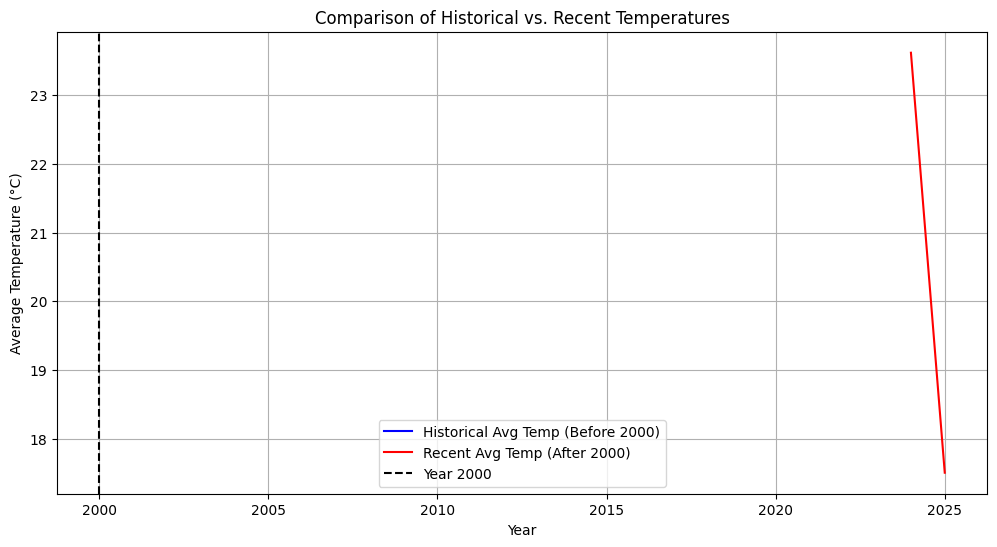

In [29]:
# Split data into historical (before 2000) and recent (after 2000)
historical_temps = yearly_avg_temp[yearly_avg_temp.index < 2000]
recent_temps = yearly_avg_temp[yearly_avg_temp.index >= 2000]

# Plot comparison
plt.figure(figsize=(12, 6))
plt.plot(historical_temps.index, historical_temps.values, label="Historical Avg Temp (Before 2000)", color='blue')
plt.plot(recent_temps.index, recent_temps.values, label="Recent Avg Temp (After 2000)", color='red')
plt.axvline(2000, color='black', linestyle='--', label="Year 2000")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.title("Comparison of Historical vs. Recent Temperatures")
plt.legend()
plt.grid()
plt.show()
